In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# read ground truth data
data = []

ground_truth_file_path = '../results/ground_truth-multi_lateral.csv'

df_gt = pd.read_csv(ground_truth_file_path,header=0)
df_gt.set_index(["current","interrupting_1","interrupting_2"])
df_gt.head()

,current,interrupting_1,interrupting_2,outcome
0,A,B,C,no-agreement
1,A,B,D,current
2,A,B,E,current
3,A,C,B,no-agreement
4,A,C,D,interrupting_1


In [ ]:
# read real data from test run
data = []

pattern = r'Users: (?P<current_user>.)(?P<interrupting_user_1>.)(?P<interrupting_user_2>.). Multi-lateral: (?P<multi_lateral>\S+). Gazebo: (?P<gazebo>\S+). Negotiation rounds: (?P<rounds>\d+). Preparation time: (?P<prep_time>\d+\.\d+) seconds. Negotiation time: (?P<time>\d+\.\d+) seconds. Result: (?P<result>\S+)'

log_file_path = '../results/results-multi_lateral.log'

with open(log_file_path, 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            current_user = match.group("current_user")
            interrupting_user_1 = match.group("interrupting_user_1")
            interrupting_user_2 = match.group("interrupting_user_2")
            gazebo = bool(match.group("gazebo")) 
            multi_lateral = bool(match.group("multi_lateral")) 
            time = float(match.group("time"))
            prep_time = float(match.group("prep_time"))
            result = match.group("result").lower()

            # if not gazebo:
            data.append({"current_user": current_user, "interrupting_user_1": interrupting_user_1, "interrupting_user_2": interrupting_user_2, "preparation_time": prep_time, "negotiation_time": time, "result": result})
        else:
            print("Diverging result: ")
            print(line)
df_rd = pd.DataFrame(data)
df_rd.head()

,current_user,interrupting_user_1,interrupting_user_2,preparation_time,negotiation_time,result
0,A,B,C,2.010,0.067,no-agreement
1,A,B,D,2.008,0.047,current
2,A,B,E,2.010,0.048,current
3,A,C,B,2.015,0.067,no-agreement
4,A,C,D,2.009,0.042,interrupting_1


In [68]:
# validation: check whether negotiation had expected outcome!
expected_outcome, differing_outcome = [],[]
for index, row in df_rd.iterrows():
    expected = df_gt.loc[(df_gt["current"]==row["current_user"]) & (df_gt["interrupting_1"]==row["interrupting_user_1"]) & (df_gt["interrupting_2"]==row["interrupting_user_2"])]["outcome"].item()
    if row["result"] == expected:
        expected_outcome.append(expected[0])
    else:
        differing_outcome.append((row["result"],expected[0]))

print("Negotiations with expected outcome: ", len(expected_outcome))
print("Negotiations with differing outcome: ", len(differing_outcome))
print("Percentage of negotiation with expected outcome: ", len(expected_outcome)/(len(expected_outcome)+len(differing_outcome))*100, "%")

Negotiations with expected outcome:  60
Negotiations with differing outcome:  0
Percentage of negotiation with expected outcome:  100.0 %


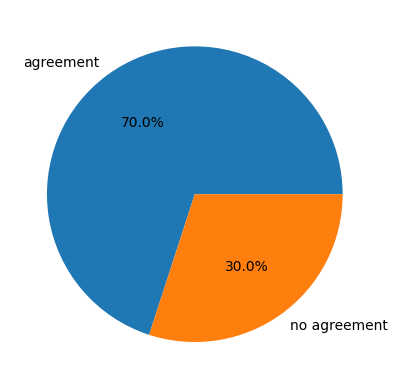

In [69]:
# analyze percentage of agreement vs non-agreement
no_agreement = df_rd.loc[df_rd["result"] == "no-agreement"]
current = df_rd.loc[df_rd["result"] == "current"]
interrupting_1 = df_rd.loc[df_rd["result"] == "interrupting_1"]
interrupting_2 = df_rd.loc[df_rd["result"] == "interrupting_2"]

plt.pie([(len(current) + len(interrupting_1) + len(interrupting_2))/90, len(no_agreement)/90], labels = ["agreement", "no agreement"], autopct='%1.1f%%')
# plt.legend()
plt.show()

Average preparation time (without gazebo): 2.0093 s


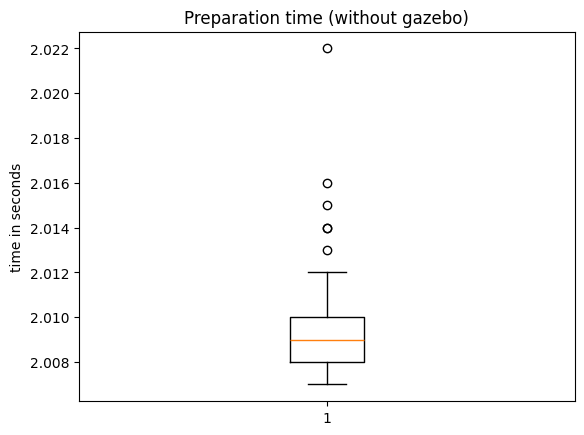

In [70]:
# analyze average preparation time without gazebo
print("Average preparation time (without gazebo): %.4f" % df_rd["preparation_time"].mean(), "s")

plt.title("Preparation time (without gazebo)")
plt.boxplot(df_rd["preparation_time"])
plt.ylabel("time in seconds")
plt.show()

Average negotiation time (without gazebo): 0.0484 s


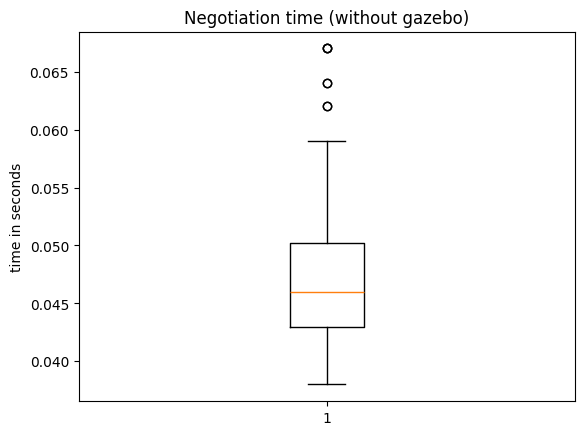

In [71]:
# analyze average negotiation time without gazebo
print("Average negotiation time (without gazebo): %.4f" % df_rd["negotiation_time"].mean(), "s")
plt.boxplot(df_rd["negotiation_time"])
plt.title("Negotiation time (without gazebo)")
plt.ylabel("time in seconds")
plt.show()

Average total time (without gazebo): 2.0576 s


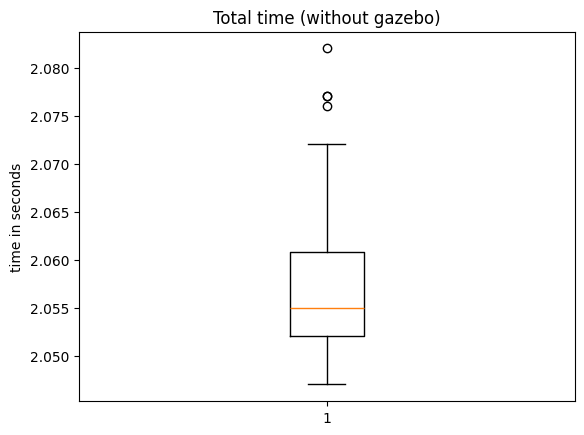

In [72]:
# analyze average preparation + negotiation time without gazebo
total_time = df_rd[["preparation_time","negotiation_time"]].sum(axis=1)
print("Average total time (without gazebo): %.4f" % total_time.mean(), "s")
plt.boxplot(total_time)
plt.title("Total time (without gazebo)")
plt.ylabel("time in seconds")
plt.show()